# Case Study - Used Cars

The dataset contains information about the top 9 famous car companies like Audi, BMW, Ford,
Hyundai, Merc, Skoda, Toyota, Vauxhall, and VW (Volkswagen).
### 1,00,000 rows and 10 columns

## Problem Statement -> Price Prediction of Used Cars

Description: Develop a predictive model using the used car dataset to accurately estimate the selling price of a used car based on its features such as model, year, mileage, transmission, fuel type, and engine size. The goal is to provide potential buyers and sellers with a reliable estimation of the fair market value of used cars, aiding in informed decision-making.
#### The columns in the dataset are:

- **Model:** The name of the car model.
- **Year:** The year the car was manufactured.
- **Price:** The price of the car.
- **Transmission:** The type of transmission the car has.
- **Mileage:** The number of miles the car has been driven.
- **FuelType:** The type of fuel the car uses.
- **Tax:** The amount of tax that is due on the car.
- **Mpg:** The miles per gallon that the car gets.
- **Engine size:** The size of the car's engine in litres.
- **Make:** The manufacturer of the car

## Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Loading Dataset

In [2]:
df = pd.read_csv('used_cars.csv')
df

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW
...,...,...,...,...,...,...,...,...,...,...,...
99182,10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi
99183,10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi
99184,10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi
99185,10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi


## EDA

In [3]:
df.shape

(99187, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99187 non-null  int64  
 1   model         99187 non-null  object 
 2   year          99187 non-null  int64  
 3   price         99187 non-null  int64  
 4   transmission  99187 non-null  object 
 5   mileage       99187 non-null  int64  
 6   fuelType      99187 non-null  object 
 7   tax           99187 non-null  int64  
 8   mpg           99187 non-null  float64
 9   engineSize    99187 non-null  float64
 10  Make          99187 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.3+ MB


In [5]:
df.describe()

,Unnamed: 0,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,6294.413532,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,4265.588536,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,0.000000,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2755.000000,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,5591.000000,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,9420.000000,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,17964.000000,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


## Checking NULL values in the dataset

In [6]:
df.isnull().sum()

Unnamed: 0      0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

- This dataset is neat and clean but there is one column with no name, so we have to drop that column

In [7]:
#method 1
df.drop(df[['Unnamed: 0']], axis = 1, inplace = True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW
...,...,...,...,...,...,...,...,...,...,...
99182,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi
99183,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi
99184,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi
99185,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi


In [ ]:
#method 2
df = df.iloc[:,1:]
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW
...,...,...,...,...,...,...,...,...,...,...
99182,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi
99183,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi
99184,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi
99185,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi


## Analyzing each and every column of dataset

### model

In [8]:
df.model.unique()

array([' T-Roc', ' Golf', ' Passat', ' T-Cross', ' Polo', ' Tiguan',
       ' Sharan', ' Up', ' Scirocco', ' Beetle', ' Caddy Maxi Life',
       ' Caravelle', ' Touareg', ' Arteon', ' Touran', ' Golf SV',
       ' Amarok', ' Tiguan Allspace', ' Shuttle', ' Jetta', ' CC',
       ' California', ' Caddy Life', ' Caddy', ' Caddy Maxi', ' Eos',
       ' Fox', ' Corsa', ' Astra', ' Viva', ' Mokka', ' Mokka X',
       ' Crossland X', ' Zafira', ' Meriva', ' Zafira Tourer', ' Adam',
       ' Grandland X', ' Antara', ' Insignia', ' Ampera', ' GTC',
       ' Combo Life', ' Vivaro', ' Cascada', ' Kadjar', ' Agila',
       ' Tigra', ' Vectra', ' GT86', ' Corolla', ' RAV4', ' Yaris',
       ' Auris', ' Aygo', ' C-HR', ' Prius', ' Avensis', ' Verso',
       ' Hilux', ' PROACE VERSO', ' Land Cruiser', ' Supra', ' Camry',
       ' Verso-S', ' IQ', ' Urban Cruiser', ' Octavia', ' Citigo',
       ' Yeti Outdoor', ' Superb', ' Kodiaq', ' Rapid', ' Karoq',
       ' Fabia', ' Yeti', ' Scala', ' Roomster', 

In [9]:
df.model.nunique()

195

In [ ]:
sb.

SyntaxError: ignored

#### Creating dummy column for 'model'

In [10]:
model_dummies = pd.get_dummies(df.model)
model_dummies

,1 Series,2 Series,3 Series,4 Series,5 Series,6 Series,7 Series,8 Series,A Class,A1,...,Z3,Z4,Zafira,Zafira Tourer,i3,i8,180,200,220,230
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Merging dummy columns with the data frame

In [11]:
df = pd.concat([df, model_dummies], axis='columns')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make,...,Z3,Z4,Zafira,Zafira Tourer,i3,i8,180,200,220,230
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW,...,0,0,0,0,0,0,0,0,0,0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW,...,0,0,0,0,0,0,0,0,0,0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW,...,0,0,0,0,0,0,0,0,0,0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW,...,0,0,0,0,0,0,0,0,0,0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi,...,0,0,0,0,0,0,0,0,0,0
99183,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi,...,0,0,0,0,0,0,0,0,0,0
99184,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi,...,0,0,0,0,0,0,0,0,0,0
99185,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi,...,0,0,0,0,0,0,0,0,0,0


#### Removing 'model' column from the data frame

In [12]:
df.drop(df[['model']], axis = 1, inplace = True)
df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make,1 Series,...,Z3,Z4,Zafira,Zafira Tourer,i3,i8,180,200,220,230
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi,0,...,0,0,0,0,0,0,0,0,0,0
99183,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi,0,...,0,0,0,0,0,0,0,0,0,0
99184,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi,0,...,0,0,0,0,0,0,0,0,0,0
99185,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi,0,...,0,0,0,0,0,0,0,0,0,0


### year

In [13]:
df.year.unique()

array([2019, 2020, 2018, 2017, 2015, 2016, 2013, 2014, 2009, 2010, 2004,
       2003, 2012, 2011, 2008, 2000, 2006, 2002, 2005, 2007, 2001, 1997,
       1970, 1999, 1998, 1996, 2060])

In [14]:
df.year.nunique()

27

[Text(0, 0, '1970'),
 Text(1, 0, '1996'),
 Text(2, 0, '1997'),
 Text(3, 0, '1998'),
 Text(4, 0, '1999'),
 Text(5, 0, '2000'),
 Text(6, 0, '2001'),
 Text(7, 0, '2002'),
 Text(8, 0, '2003'),
 Text(9, 0, '2004'),
 Text(10, 0, '2005'),
 Text(11, 0, '2006'),
 Text(12, 0, '2007'),
 Text(13, 0, '2008'),
 Text(14, 0, '2009'),
 Text(15, 0, '2010'),
 Text(16, 0, '2011'),
 Text(17, 0, '2012'),
 Text(18, 0, '2013'),
 Text(19, 0, '2014'),
 Text(20, 0, '2015'),
 Text(21, 0, '2016'),
 Text(22, 0, '2017'),
 Text(23, 0, '2018'),
 Text(24, 0, '2019'),
 Text(25, 0, '2020'),
 Text(26, 0, '2060')]

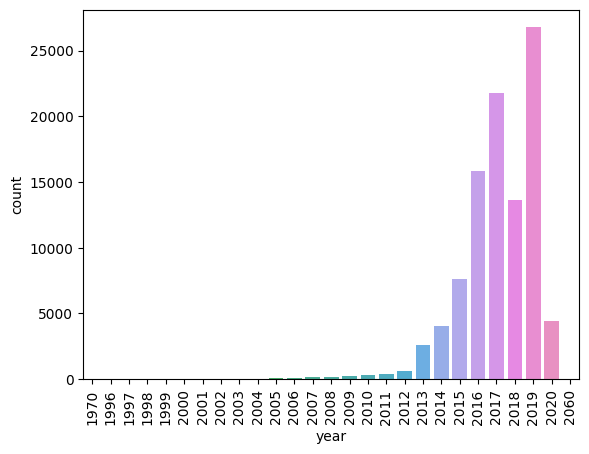

In [15]:
b = sb.countplot(x = df.year, data = df)
b.set_xticklabels(b.get_xticklabels(), rotation = 90)

### price

In [16]:
df.price.unique()

array([25000, 26883, 20000, ..., 53792, 46395, 45595])

In [17]:
df.price.nunique()

13236

<ipython-input-18-b80341d5e0cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x = df.price)


<Axes: ylabel='Density'>

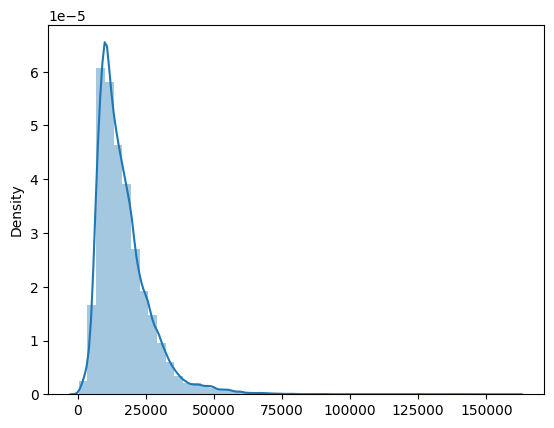

In [18]:
sb.distplot(x = df.price)

### transmission

In [19]:
df.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [20]:
df.transmission.nunique()

4

[Text(0, 0, 'Automatic'),
 Text(1, 0, 'Manual'),
 Text(2, 0, 'Semi-Auto'),
 Text(3, 0, 'Other')]

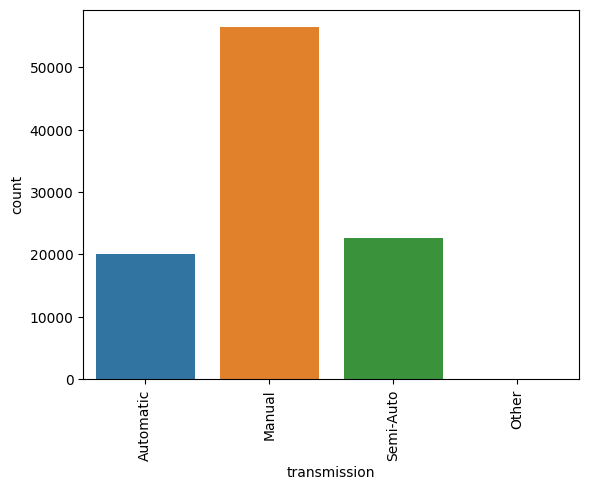

In [21]:
c = sb.countplot(x = df.transmission, data = df)
c.set_xticklabels(c.get_xticklabels(), rotation = 90)

#### Creating dummy column for 'transmission'

In [22]:
transmission_dummies = pd.get_dummies(df.transmission)
transmission_dummies

,Automatic,Manual,Other,Semi-Auto
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
99182,0,1,0,0
99183,0,1,0,0
99184,0,1,0,0
99185,1,0,0,0


#### Merging dummy columns with the data frame

In [24]:
df = pd.concat([df, transmission_dummies], axis='columns')
df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make,1 Series,...,i3,i8,180,200,220,230,Automatic,Manual,Other,Semi-Auto
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW,0,...,0,0,0,0,0,0,1,0,0,0
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW,0,...,0,0,0,0,0,0,1,0,0,0
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW,0,...,0,0,0,0,0,0,0,1,0,0
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW,0,...,0,0,0,0,0,0,1,0,0,0
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi,0,...,0,0,0,0,0,0,0,1,0,0
99183,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi,0,...,0,0,0,0,0,0,0,1,0,0
99184,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi,0,...,0,0,0,0,0,0,0,1,0,0
99185,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi,0,...,0,0,0,0,0,0,1,0,0,0


#### Removing 'transmission' column from the data frame

In [25]:
df.drop(df[['transmission']], axis = 1, inplace = True)
df

,year,price,mileage,fuelType,tax,mpg,engineSize,Make,1 Series,2 Series,...,i3,i8,180,200,220,230,Automatic,Manual,Other,Semi-Auto
0,2019,25000,13904,Diesel,145,49.6,2.0,VW,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2019,26883,4562,Diesel,145,49.6,2.0,VW,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2019,20000,7414,Diesel,145,50.4,2.0,VW,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2019,33492,4825,Petrol,145,32.5,2.0,VW,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2019,22900,6500,Petrol,150,39.8,1.5,VW,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2020,16999,4018,Petrol,145,49.6,1.0,Audi,0,0,...,0,0,0,0,0,0,0,1,0,0
99183,2020,16999,1978,Petrol,150,49.6,1.0,Audi,0,0,...,0,0,0,0,0,0,0,1,0,0
99184,2020,17199,609,Petrol,150,49.6,1.0,Audi,0,0,...,0,0,0,0,0,0,0,1,0,0
99185,2017,19499,8646,Petrol,150,47.9,1.4,Audi,0,0,...,0,0,0,0,0,0,1,0,0,0


### mileage

In [26]:
df.mileage.unique()

array([13904,  4562,  7414, ..., 29666,  8571,  4018])

In [27]:
df.mileage.nunique()

42214

In [28]:
df.mileage

0        13904
1         4562
2         7414
3         4825
4         6500
         ...  
99182     4018
99183     1978
99184      609
99185     8646
99186    11855
Name: mileage, Length: 99187, dtype: int64

<ipython-input-29-283a214a32bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.mileage)


<Axes: xlabel='mileage', ylabel='Density'>

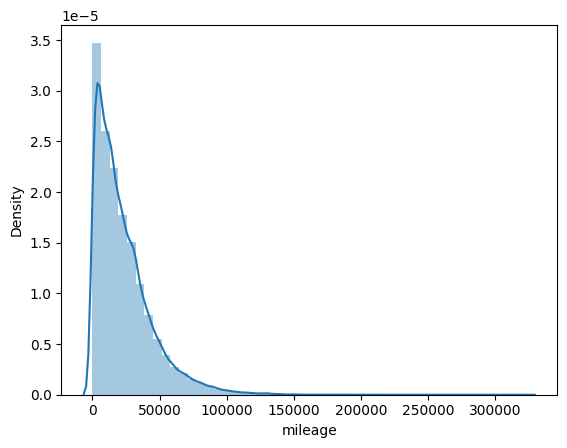

In [29]:
sb.distplot(df.mileage)

### fuelType

In [30]:
df.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

In [31]:
df.fuelType.nunique()

5

[Text(0, 0, 'Diesel'),
 Text(1, 0, 'Petrol'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'Hybrid'),
 Text(4, 0, 'Electric')]

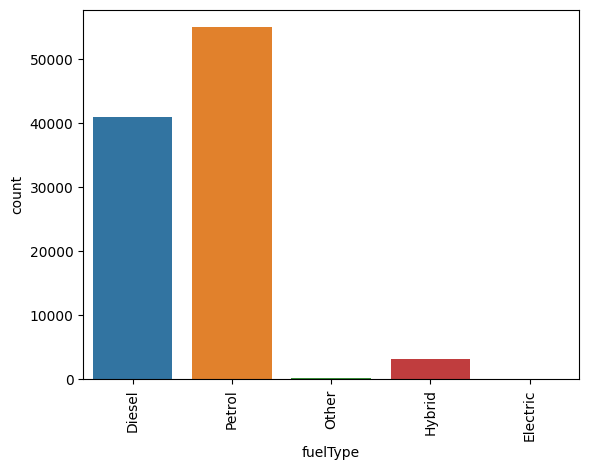

In [32]:
d = sb.countplot(data = df, x = df.fuelType)
d.set_xticklabels(d.get_xticklabels(), rotation = 90)

#### Creating dummy column for the 'fuelType'

In [33]:
fuelType_dummies = pd.get_dummies(df.fuelType)
fuelType_dummies

,Diesel,Electric,Hybrid,Other,Petrol
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
99182,0,0,0,0,1
99183,0,0,0,0,1
99184,0,0,0,0,1
99185,0,0,0,0,1


#### Merging dummy columns with the data frame

In [34]:
df = pd.concat([df, fuelType_dummies], axis='columns')
df

,year,price,mileage,fuelType,tax,mpg,engineSize,Make,1 Series,2 Series,...,230,Automatic,Manual,Other,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,2019,25000,13904,Diesel,145,49.6,2.0,VW,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2019,26883,4562,Diesel,145,49.6,2.0,VW,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2019,20000,7414,Diesel,145,50.4,2.0,VW,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2019,33492,4825,Petrol,145,32.5,2.0,VW,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2019,22900,6500,Petrol,150,39.8,1.5,VW,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2020,16999,4018,Petrol,145,49.6,1.0,Audi,0,0,...,0,0,1,0,0,0,0,0,0,1
99183,2020,16999,1978,Petrol,150,49.6,1.0,Audi,0,0,...,0,0,1,0,0,0,0,0,0,1
99184,2020,17199,609,Petrol,150,49.6,1.0,Audi,0,0,...,0,0,1,0,0,0,0,0,0,1
99185,2017,19499,8646,Petrol,150,47.9,1.4,Audi,0,0,...,0,1,0,0,0,0,0,0,0,1


#### Removing 'fuelType' column from the data frame

In [35]:
df.drop(df[['fuelType']], axis = 1, inplace = True)
df

,year,price,mileage,tax,mpg,engineSize,Make,1 Series,2 Series,3 Series,...,230,Automatic,Manual,Other,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,2019,25000,13904,145,49.6,2.0,VW,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2019,26883,4562,145,49.6,2.0,VW,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2019,20000,7414,145,50.4,2.0,VW,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2019,33492,4825,145,32.5,2.0,VW,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2019,22900,6500,150,39.8,1.5,VW,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2020,16999,4018,145,49.6,1.0,Audi,0,0,0,...,0,0,1,0,0,0,0,0,0,1
99183,2020,16999,1978,150,49.6,1.0,Audi,0,0,0,...,0,0,1,0,0,0,0,0,0,1
99184,2020,17199,609,150,49.6,1.0,Audi,0,0,0,...,0,0,1,0,0,0,0,0,0,1
99185,2017,19499,8646,150,47.9,1.4,Audi,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### tax

In [36]:
df.tax.unique()

array([145, 150,   0, 200,  20,  30, 235, 125, 205, 165, 325, 300, 160,
       135, 140, 260, 265, 245, 240, 280, 305, 570, 190, 220, 155, 555,
       330, 315, 580, 115, 185, 195, 120, 290, 230, 565, 130, 250,  10,
       540, 270, 520, 255, 210, 110, 295, 535, 515])

In [37]:
df.tax.nunique()

48

[Text(0, 0, '0'),
 Text(1, 0, '10'),
 Text(2, 0, '20'),
 Text(3, 0, '30'),
 Text(4, 0, '110'),
 Text(5, 0, '115'),
 Text(6, 0, '120'),
 Text(7, 0, '125'),
 Text(8, 0, '130'),
 Text(9, 0, '135'),
 Text(10, 0, '140'),
 Text(11, 0, '145'),
 Text(12, 0, '150'),
 Text(13, 0, '155'),
 Text(14, 0, '160'),
 Text(15, 0, '165'),
 Text(16, 0, '185'),
 Text(17, 0, '190'),
 Text(18, 0, '195'),
 Text(19, 0, '200'),
 Text(20, 0, '205'),
 Text(21, 0, '210'),
 Text(22, 0, '220'),
 Text(23, 0, '230'),
 Text(24, 0, '235'),
 Text(25, 0, '240'),
 Text(26, 0, '245'),
 Text(27, 0, '250'),
 Text(28, 0, '255'),
 Text(29, 0, '260'),
 Text(30, 0, '265'),
 Text(31, 0, '270'),
 Text(32, 0, '280'),
 Text(33, 0, '290'),
 Text(34, 0, '295'),
 Text(35, 0, '300'),
 Text(36, 0, '305'),
 Text(37, 0, '315'),
 Text(38, 0, '325'),
 Text(39, 0, '330'),
 Text(40, 0, '515'),
 Text(41, 0, '520'),
 Text(42, 0, '535'),
 Text(43, 0, '540'),
 Text(44, 0, '555'),
 Text(45, 0, '565'),
 Text(46, 0, '570'),
 Text(47, 0, '580')]

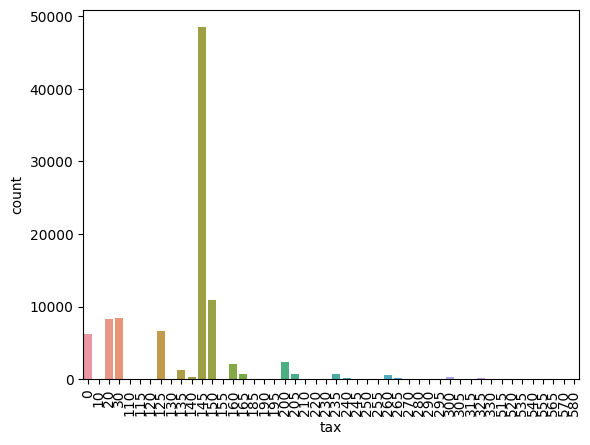

In [38]:
e = sb.countplot(data = df, x = df.tax)
e.set_xticklabels(e.get_xticklabels(), rotation = 90)

### mpg

In [39]:
df.mpg.unique()

array([4.960e+01, 5.040e+01, 3.250e+01, 3.980e+01, 4.220e+01, 4.410e+01,
       5.330e+01, 5.540e+01, 4.630e+01, 5.650e+01, 6.010e+01, 5.140e+01,
       3.450e+01, 6.570e+01, 5.230e+01, 4.150e+01, 5.890e+01, 4.480e+01,
       5.770e+01, 3.280e+01, 4.040e+01, 3.770e+01, 6.890e+01, 6.730e+01,
       3.720e+01, 4.560e+01, 5.430e+01, 3.620e+01, 4.090e+01, 5.760e+01,
       6.280e+01, 4.710e+01, 2.460e+01, 7.430e+01, 3.360e+01, 4.350e+01,
       6.140e+01, 7.240e+01, 4.790e+01, 3.580e+01, 1.662e+02, 8.830e+01,
       6.420e+01, 1.883e+02, 3.920e+01, 4.870e+01, 1.569e+02, 1.413e+02,
       3.670e+01, 7.060e+01, 3.820e+01, 3.490e+01, 3.320e+01, 2.620e+01,
       4.280e+01, 1.660e+02, 6.110e+01, 7.630e+01, 8.310e+01, 4.700e+01,
       7.640e+01, 6.170e+01, 4.770e+01, 3.100e+01, 3.040e+01, 3.530e+01,
       3.140e+01, 3.010e+01, 3.870e+01, 3.170e+01, 2.910e+01, 2.970e+01,
       3.210e+01, 2.940e+01, 3.400e+01, 3.440e+01, 2.850e+01, 2.550e+01,
       2.590e+01, 2.690e+01, 3.000e-01, 2.830e+01, 

In [40]:
df.mpg.nunique()

208

<ipython-input-41-45c6f6aa5bd6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.mpg)


<Axes: xlabel='mpg', ylabel='Density'>

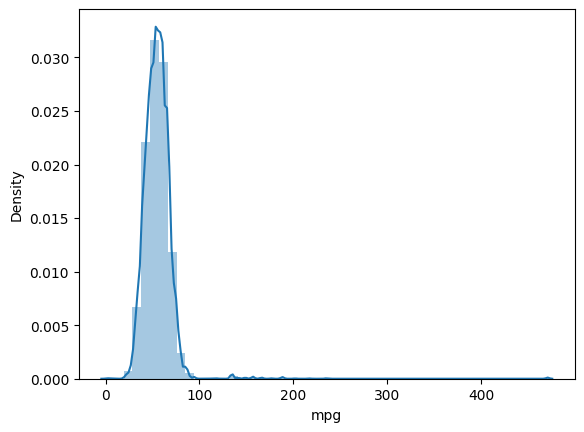

In [41]:
sb.distplot(df.mpg)

### engineSize

In [42]:
df.engineSize.unique()

array([2. , 1.5, 1. , 1.6, 0. , 1.4, 3.2, 1.2, 1.9, 1.8, 2.5, 3. , 1.3,
       1.7, 1.1, 2.2, 2.8, 2.4, 4.2, 4.5, 2.1, 5.5, 4. , 6.2, 3.5, 2.9,
       4.7, 2.3, 6. , 5. , 2.7, 3.7, 5.4, 4.3, 0.6, 4.4, 6.6, 5.2, 4.1,
       6.3])

In [43]:
df.engineSize.nunique()

40

[Text(0, 0, '0.0'),
 Text(1, 0, '0.6'),
 Text(2, 0, '1.0'),
 Text(3, 0, '1.1'),
 Text(4, 0, '1.2'),
 Text(5, 0, '1.3'),
 Text(6, 0, '1.4'),
 Text(7, 0, '1.5'),
 Text(8, 0, '1.6'),
 Text(9, 0, '1.7'),
 Text(10, 0, '1.8'),
 Text(11, 0, '1.9'),
 Text(12, 0, '2.0'),
 Text(13, 0, '2.1'),
 Text(14, 0, '2.2'),
 Text(15, 0, '2.3'),
 Text(16, 0, '2.4'),
 Text(17, 0, '2.5'),
 Text(18, 0, '2.7'),
 Text(19, 0, '2.8'),
 Text(20, 0, '2.9'),
 Text(21, 0, '3.0'),
 Text(22, 0, '3.2'),
 Text(23, 0, '3.5'),
 Text(24, 0, '3.7'),
 Text(25, 0, '4.0'),
 Text(26, 0, '4.1'),
 Text(27, 0, '4.2'),
 Text(28, 0, '4.3'),
 Text(29, 0, '4.4'),
 Text(30, 0, '4.5'),
 Text(31, 0, '4.7'),
 Text(32, 0, '5.0'),
 Text(33, 0, '5.2'),
 Text(34, 0, '5.4'),
 Text(35, 0, '5.5'),
 Text(36, 0, '6.0'),
 Text(37, 0, '6.2'),
 Text(38, 0, '6.3'),
 Text(39, 0, '6.6')]

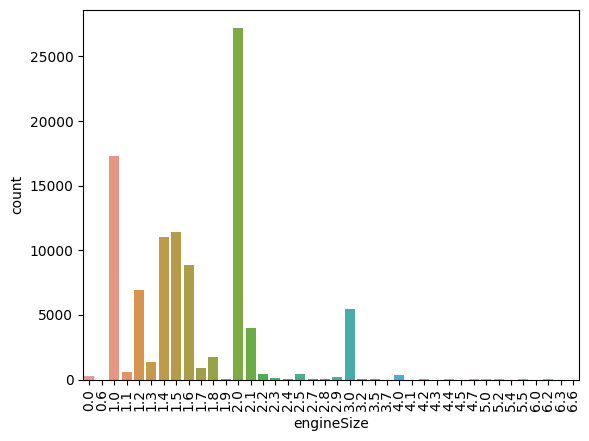

In [44]:
f = sb.countplot(data = df, x = df.engineSize)
f.set_xticklabels(f.get_xticklabels(), rotation = 90)

### Make

In [45]:
df.Make.unique()

array(['VW', 'vauxhall', 'toyota', 'skoda', 'merc', 'hyundi', 'ford',
       'BMW', 'Audi'], dtype=object)

In [46]:
df.Make.nunique()

9

[Text(0, 0, 'VW'),
 Text(1, 0, 'vauxhall'),
 Text(2, 0, 'toyota'),
 Text(3, 0, 'skoda'),
 Text(4, 0, 'merc'),
 Text(5, 0, 'hyundi'),
 Text(6, 0, 'ford'),
 Text(7, 0, 'BMW'),
 Text(8, 0, 'Audi')]

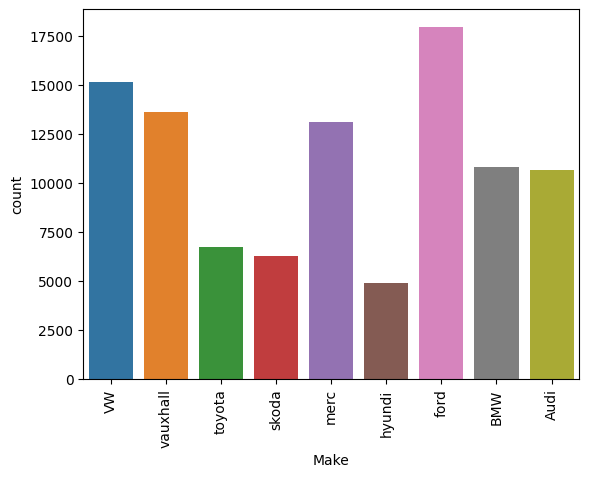

In [47]:
g = sb.countplot(x = df.Make, data = df)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

#### Creating the dummy column for the 'Make' (brand names)

In [48]:
Make_dummies = pd.get_dummies(df.Make)
Make_dummies

,Audi,BMW,VW,ford,hyundi,merc,skoda,toyota,vauxhall
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
99182,1,0,0,0,0,0,0,0,0
99183,1,0,0,0,0,0,0,0,0
99184,1,0,0,0,0,0,0,0,0
99185,1,0,0,0,0,0,0,0,0


#### Merging dummy columns with the data frame

In [49]:
df = pd.concat([df, Make_dummies], axis='columns')
df

,year,price,mileage,tax,mpg,engineSize,Make,1 Series,2 Series,3 Series,...,Petrol,Audi,BMW,VW,ford,hyundi,merc,skoda,toyota,vauxhall
0,2019,25000,13904,145,49.6,2.0,VW,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2019,26883,4562,145,49.6,2.0,VW,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2019,20000,7414,145,50.4,2.0,VW,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2019,33492,4825,145,32.5,2.0,VW,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,2019,22900,6500,150,39.8,1.5,VW,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2020,16999,4018,145,49.6,1.0,Audi,0,0,0,...,1,1,0,0,0,0,0,0,0,0
99183,2020,16999,1978,150,49.6,1.0,Audi,0,0,0,...,1,1,0,0,0,0,0,0,0,0
99184,2020,17199,609,150,49.6,1.0,Audi,0,0,0,...,1,1,0,0,0,0,0,0,0,0
99185,2017,19499,8646,150,47.9,1.4,Audi,0,0,0,...,1,1,0,0,0,0,0,0,0,0


#### Removing 'Make' column from the data frame

In [50]:
df.drop(df[['Make']], axis = 1, inplace = True)
df

,year,price,mileage,tax,mpg,engineSize,1 Series,2 Series,3 Series,4 Series,...,Petrol,Audi,BMW,VW,ford,hyundi,merc,skoda,toyota,vauxhall
0,2019,25000,13904,145,49.6,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2019,26883,4562,145,49.6,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2019,20000,7414,145,50.4,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2019,33492,4825,145,32.5,2.0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,2019,22900,6500,150,39.8,1.5,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2020,16999,4018,145,49.6,1.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
99183,2020,16999,1978,150,49.6,1.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
99184,2020,17199,609,150,49.6,1.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
99185,2017,19499,8646,150,47.9,1.4,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


## Corelation-Coefficient

In [51]:
df.corr()

,year,price,mileage,tax,mpg,engineSize,1 Series,2 Series,3 Series,4 Series,...,Petrol,Audi,BMW,VW,ford,hyundi,merc,skoda,toyota,vauxhall
year,1.000000,0.490829,-0.738604,0.195693,-0.132791,-0.038576,-0.032081,0.037555,-0.030482,0.018754,...,0.074336,0.002117,-0.001445,0.033607,-0.048969,0.002126,0.038338,0.050694,-0.043163,-0.024276
price,0.490829,1.000000,-0.417954,0.307648,-0.296429,0.638114,-0.014188,0.031037,0.049533,0.058083,...,-0.229237,0.214320,0.209811,0.001446,-0.215714,-0.093291,0.312329,-0.066589,-0.117189,-0.258874
mileage,-0.738604,-0.417954,1.000000,-0.220761,0.185657,0.109073,0.032686,-0.031865,0.066119,-0.006056,...,-0.226817,0.029027,0.040258,-0.019402,0.006776,-0.016882,-0.020480,-0.036109,-0.002572,0.008312
tax,0.195693,0.307648,-0.220761,1.000000,-0.451451,0.278411,-0.025729,0.013583,0.008119,0.019972,...,0.124892,0.031398,0.063052,-0.050813,-0.051873,0.003045,0.059798,-0.011896,-0.109451,0.053519
mpg,-0.132791,-0.296429,0.185657,-0.451451,1.000000,-0.248210,0.022101,0.004833,0.028518,0.002149,...,-0.299703,-0.094580,0.026663,-0.037198,0.079853,-0.018833,-0.000266,0.022888,0.131742,-0.089830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hyundi,0.002126,-0.093291,-0.016882,0.003045,-0.018833,-0.083590,-0.032304,-0.025425,-0.036070,-0.022849,...,0.019789,-0.078799,-0.079266,-0.096403,-0.106752,1.000000,-0.088620,-0.058949,-0.061279,-0.090606
merc,0.038338,0.312329,-0.020480,0.059798,-0.000266,0.285824,-0.055562,-0.043731,-0.062041,-0.039301,...,-0.210316,-0.135535,-0.136338,-0.165813,-0.183614,-0.088620,1.000000,-0.101392,-0.105401,-0.155843
skoda,0.050694,-0.066589,-0.036109,-0.011896,0.022888,-0.107008,-0.036959,-0.029089,-0.041269,-0.026143,...,0.058391,-0.090157,-0.090691,-0.110297,-0.122138,-0.058949,-0.101392,1.000000,-0.070112,-0.103665
toyota,-0.043163,-0.117189,-0.002572,-0.109451,0.131742,-0.092944,-0.038421,-0.030239,-0.042901,-0.027176,...,0.028663,-0.093721,-0.094276,-0.114658,-0.126967,-0.061279,-0.105401,-0.070112,1.000000,-0.107763


<Axes: >

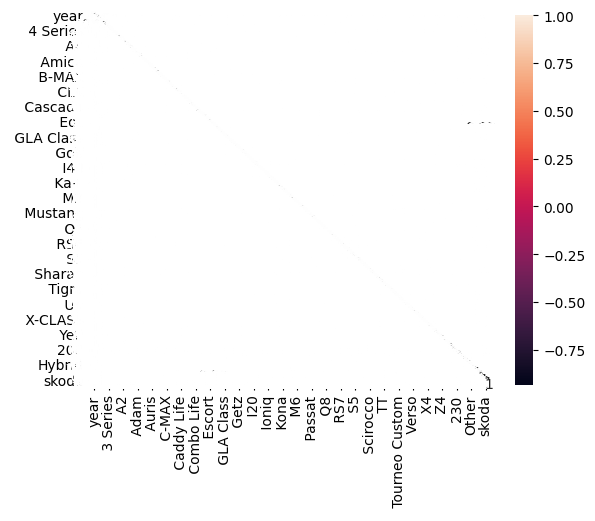

In [52]:
sb.heatmap(df.corr(), annot = True)

## Feature Selection

In [4]:
#independent variables
x = df.drop(df[['price']], axis = 1)
x

NameError: ignored

In [54]:
#dependent variable
y = df.price
y

0        25000
1        26883
2        20000
3        33492
4        22900
         ...  
99182    16999
99183    16999
99184    17199
99185    19499
99186    15999
Name: price, Length: 99187, dtype: int64

## Feature Scaling

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

NameError: ignored

## Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

NameError: ignored

In [57]:
x_train

array([[ 0.90194841, -0.99747865,  0.3928356 , ..., -0.26172324,
        -0.26955336, -0.40030152],
       [-0.04075356, -0.63659482,  0.0761607 , ..., -0.26172324,
        -0.26955336,  2.49811693],
       [ 0.90194841, -0.71461735,  0.3928356 , ..., -0.26172324,
        -0.26955336, -0.40030152],
       ...,
       [ 0.90194841, -0.7007372 ,  0.3928356 , ..., -0.26172324,
        -0.26955336, -0.40030152],
       [-0.51210455, -0.22928592, -1.58638252, ..., -0.26172324,
        -0.26955336, -0.40030152],
       [ 0.43059742, -0.60400252,  0.3928356 , ..., -0.26172324,
        -0.26955336, -0.40030152]])

In [58]:
x_test

array([[-0.98180019,  0.72267376,  1.33747631, ..., -0.25493939,
        -0.270938  , -0.39652178],
       [-1.45141101,  1.51643764,  6.88100409, ..., -0.25493939,
        -0.270938  , -0.39652178],
       [-0.04257855, -0.12066799,  0.46635052, ..., -0.25493939,
        -0.270938  ,  2.52192954],
       ...,
       [-1.45141101,  2.68945107, -1.43428758, ..., -0.25493939,
        -0.270938  , -0.39652178],
       [-0.51218937,  1.11294061, -1.43428758, ..., -0.25493939,
        -0.270938  ,  2.52192954],
       [-0.51218937,  1.52594831, -1.59267409, ..., -0.25493939,
        -0.270938  ,  2.52192954]])

## Modeling

In [1]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

NameError: ignored

## Prediction

In [ ]:
prediction = model.predict(x_test)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([20990])

## Checking the performance of the matrix

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Confusion Matrix

In [ ]:
confusion_matrix(y_test,prediction)

### Classification Report

In [6]:
print(classification_report(y_test,prediction))

NameError: ignored

### Accuracy Score

In [ ]:
print(accuracy_score(y_test,prediction))